In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract
from pytesseract import image_to_string
import os
os.sys.path
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
import numpy as np

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 16 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,684 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

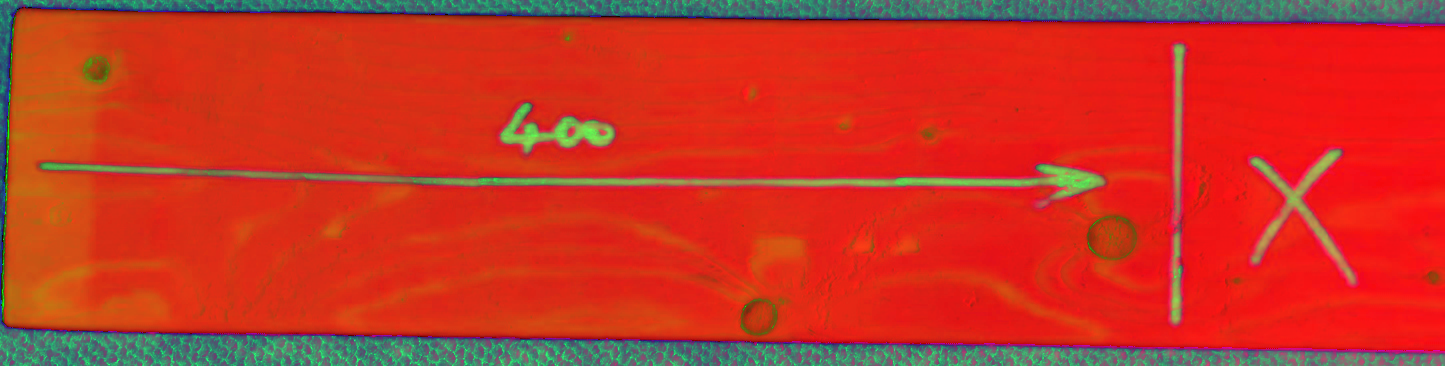

In [21]:
from google.colab.patches import cv2_imshow
 
img=cv2.imread('carpenter.jpg')
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2_imshow(hsv)

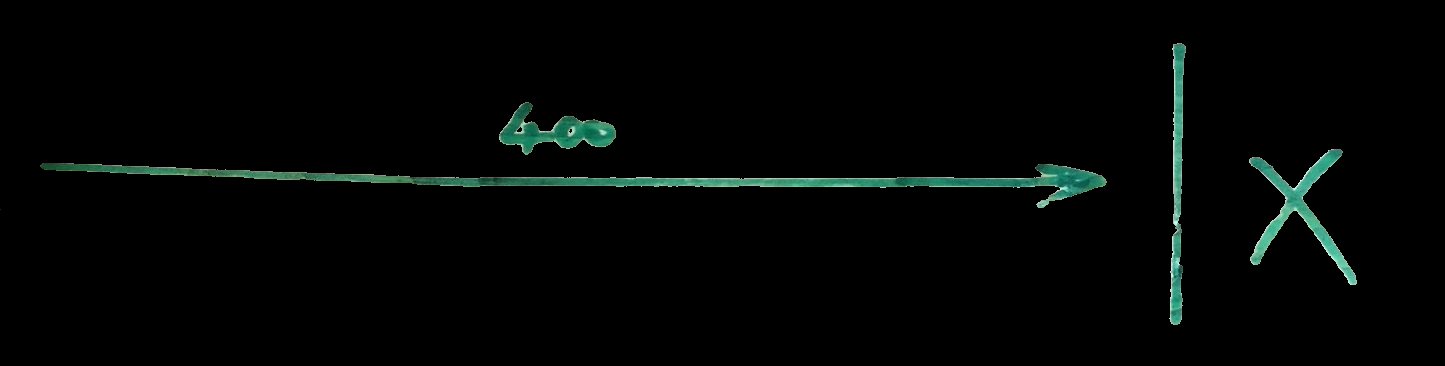

In [10]:
  # define range of blue color in HSV
  lower_green = np.array([55,50,0])
  upper_green = np.array([90,255,255])

  # Threshold the HSV image to get only blue colors
  mask = cv2.inRange(hsv, lower_green, upper_green)

  # Bitwise-AND mask and original image
  res = cv2.bitwise_and(img,img, mask= mask)
  cv2_imshow(res)


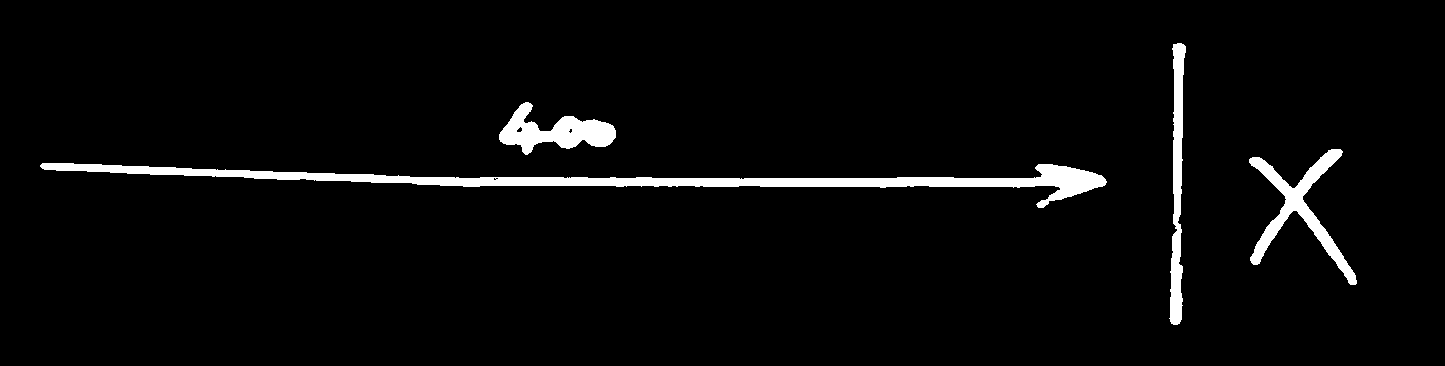

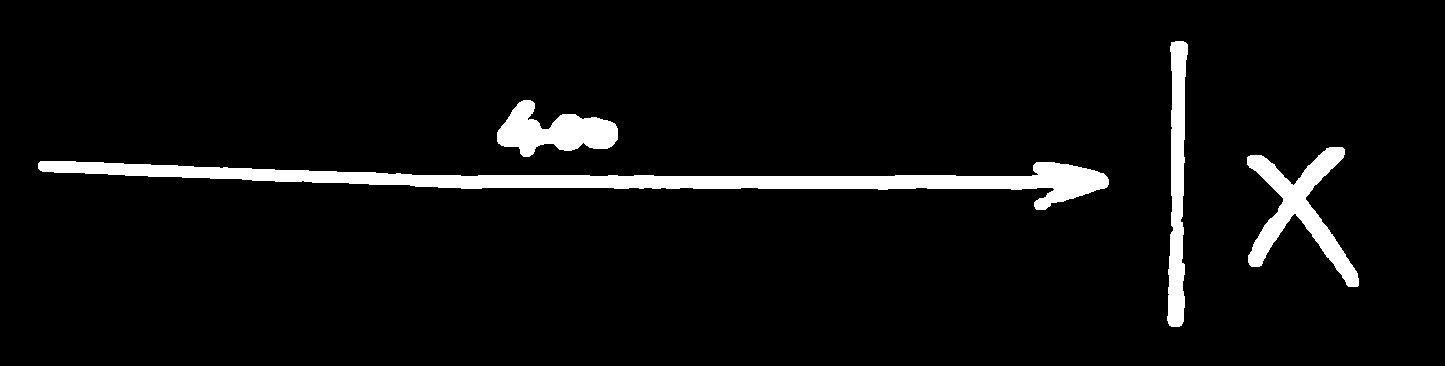

In [11]:
#tresholding
kernel = np.ones((5,5),np.uint8)
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(gray,40,255,cv2.THRESH_BINARY)
dilation = cv2.dilate(thresh1,kernel,iterations = 1)
cv2_imshow(thresh1)
cv2_imshow(dilation)


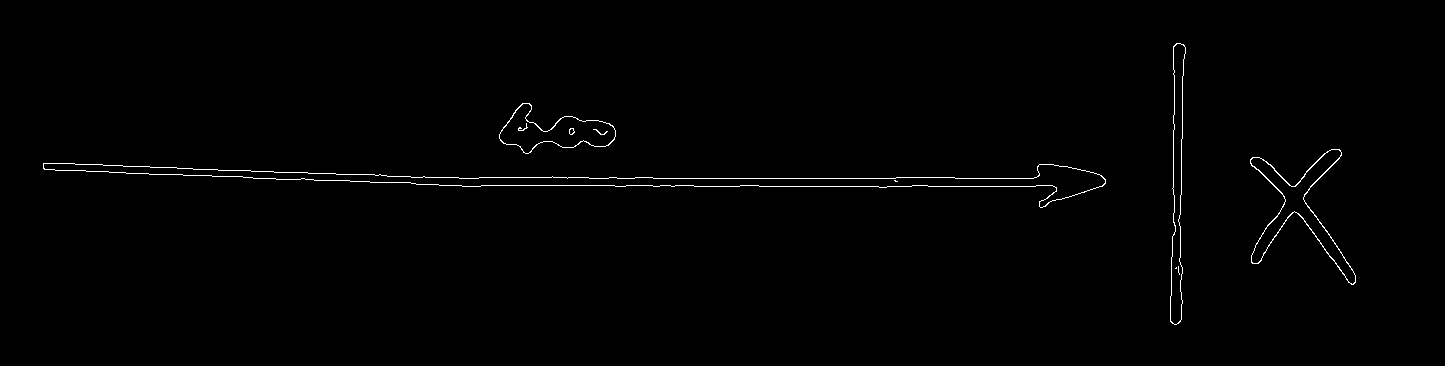

In [12]:
median_blur = cv2.medianBlur(res,9)
edges = cv2.Canny(median_blur,100,170)
cv2_imshow(edges)

Number of contours2


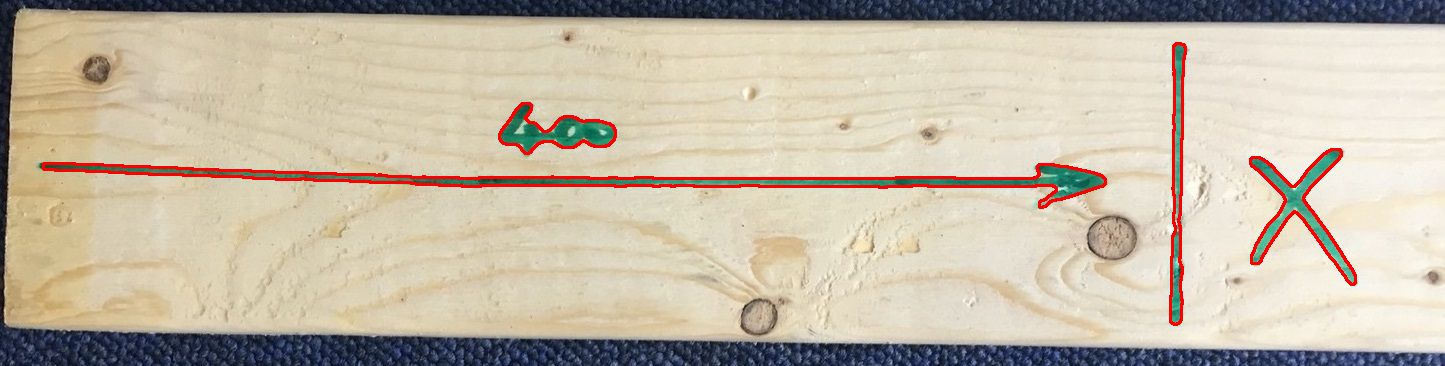

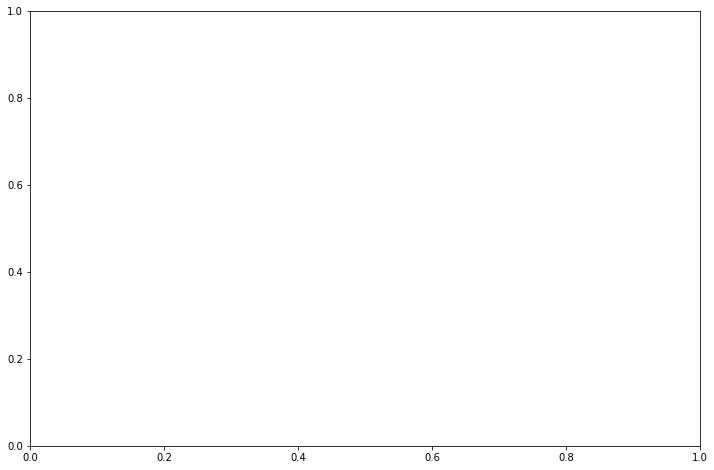

In [13]:
contours = cv2.findContours(edges, 
                            cv2.RETR_EXTERNAL,
                            cv2.CHAIN_APPROX_NONE)

 

print("Number of contours" + str(len(contours)))

 

cv2.drawContours(img, contours[0], -1, (0,0,255), thickness = 2)
fig, ax = plt.subplots(1, figsize=(12,8))
#plt.imshow(img)
cv2_imshow(img)

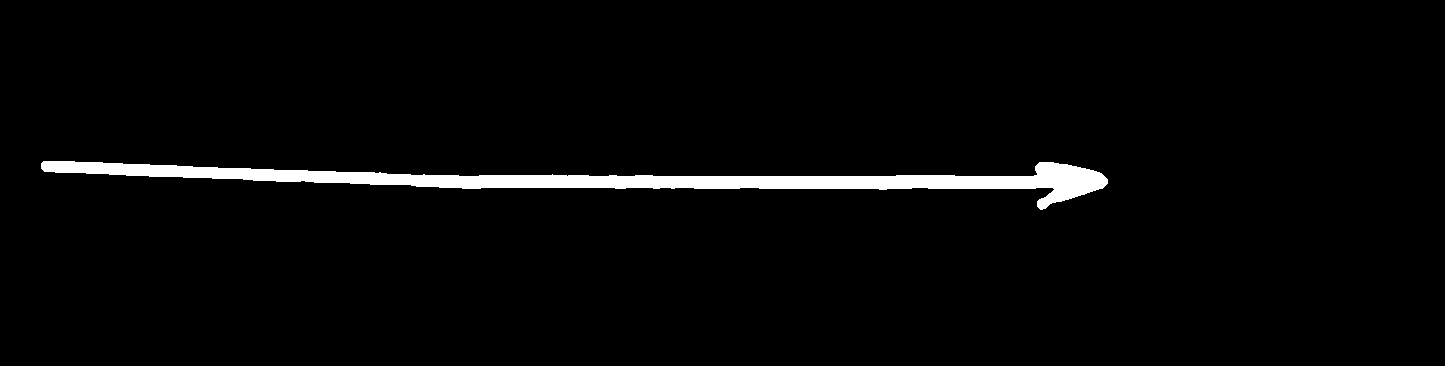

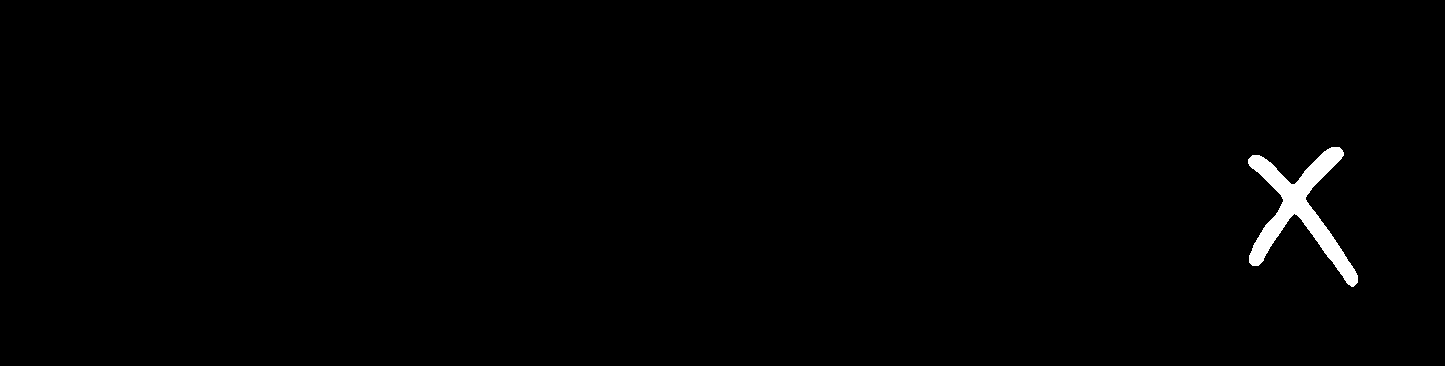

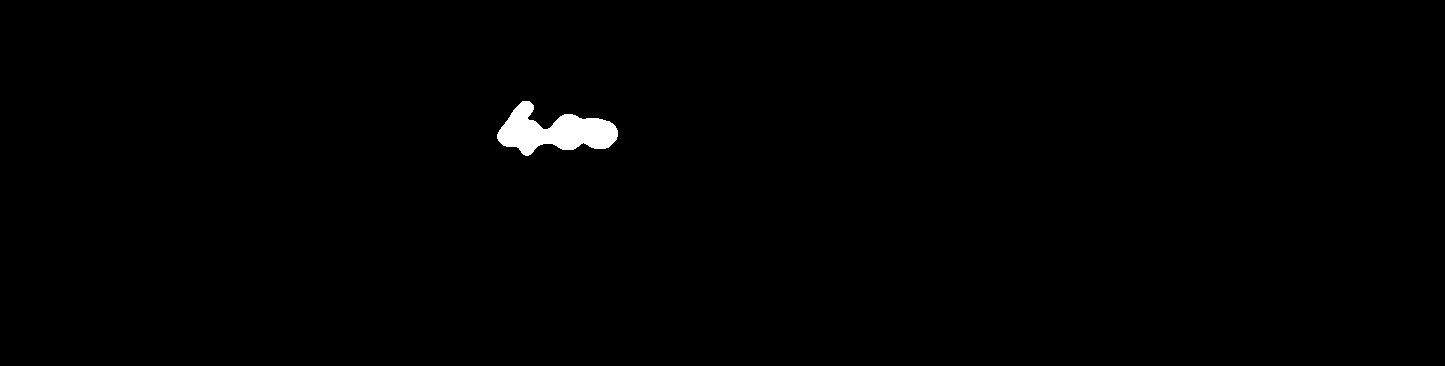

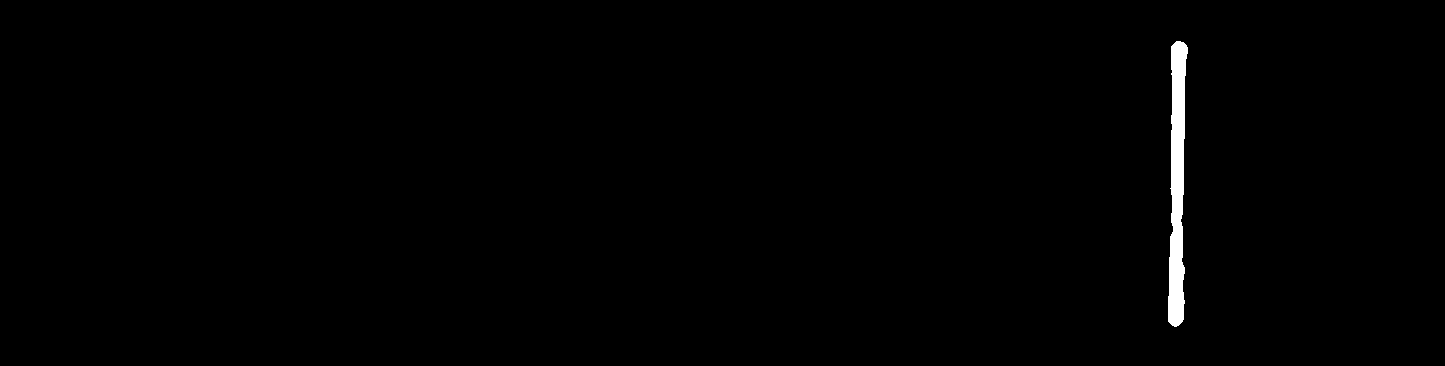

In [22]:
image = cv2.imread('test3.png')

 

height, width = image.shape[:2]
image = np.zeros((height,width,3), dtype = "uint8")

 

#edge = cv2.imread('hsv2.png')
contours, h = cv2.findContours(edges, 
                               cv2.RETR_EXTERNAL,
                               cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

 

for i in range(0, len(contours)):
    img = image.copy()
    cnt = contours[i]
    cv2.drawContours(img, cnt, -1, (255,255,255), thickness = 3) 
    cv2.fillPoly(img, pts =[cnt], color=(255,255,255))
    cv2_imshow(img)
    #cv2.destroyAllWindows()
    cv2.imwrite('cnt'+ str(i)+'.jpg',img)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# connect to google driver
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
path = '/content/drive/MyDrive/Project of Image Analysis/X'

In [20]:
import glob
import cv2
import numpy
from google.colab.patches import cv2_imshow
from os import listdir
from os.path import isfile, join

onlyfiles = [ f for f in listdir(path) if isfile(join(path,f)) ]
images = numpy.empty(len(onlyfiles), dtype=object)
for n in range(0, len(onlyfiles)):
  images[n] = cv2.imread( join(path,onlyfiles[n]) )


#images = [cv2.imread(file) for file in glob.glob("path/*.png")]
#print(*images, sep='\n')
#print(str(images)) 

In [30]:
import skimage.color
import skimage.filters
import skimage.io
import skimage.viewer

# blur and grayscale before thresholding
blur = skimage.color.rgb2gray(images)
blur = skimage.filters.gaussian(blur, sigma=k)

# perform inverse binary thresholding
mask = blur > t_rescaled

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Viewer requires Qt
  after removing the cwd from sys.path.


ValueError: ignored

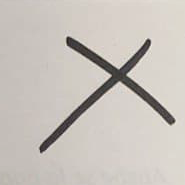

In [28]:
picc = images[0]
type(images)
cv2_imshow(picc)